In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import StandardScaler


In [2]:
gt_data=pd.read_csv('gas_turbines.csv')

In [3]:
gt_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
gt_data.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [5]:
gt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gt_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
gt_data[gt_data.duplicated()].shape

(0, 11)

In [8]:
gt_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:
## We can get information about min , 50% and max as well get to know the distribution
## values

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO', ylabel='Density'>

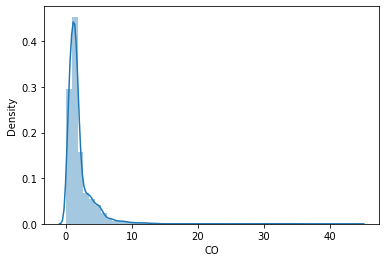

In [10]:
sns.distplot(gt_data['CO'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO'>

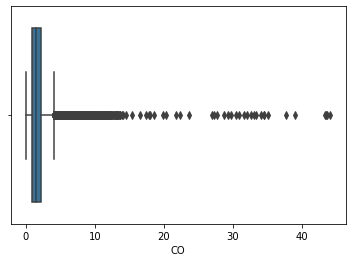

In [11]:
sns.boxplot(gt_data['CO'])

In [12]:
min(gt_data['CO'])

0.00038751

In [13]:
max(gt_data['CO'])

44.103

## Understanding Target Variable

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

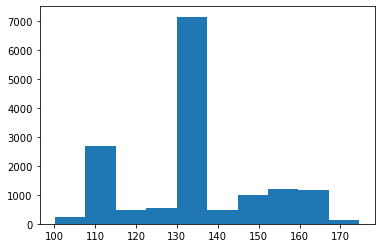

In [14]:
plt.hist(gt_data['TEY'])

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
st_gt_data=scaler.fit_transform(gt_data)
df=pd.DataFrame(st_gt_data,columns=gt_data.columns)

In [17]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [18]:
X=df.drop(['TEY'],axis=1)
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591


In [19]:
Y=df['TEY']
Y.head()

0   -1.231172
1   -1.229909
2   -1.230541
3   -1.229909
4   -1.229909
Name: TEY, dtype: float64

In [20]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [21]:
n_features=X.shape[1]
n_features

10

In [22]:
def create_model(optimizer='adam'):
    model=Sequential()
    model.add(Dense(12,input_dim=n_features,kernel_initializer='uniform',
                   activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    #here we take loss func as means_squared_error coz its regression classifier
    model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])
    return model

## Early Stopping

In [23]:
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=20,
    verbose=3,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

## Gridsearch with HyperParamater Tuning

In [24]:
model=KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,20]
optimizer=['SGD', 'RMSprop', 'Adam']

## Make a dictionary of grid search Paramters
param_grid=dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer)

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=3)


# Fitting parameters
fit_params = dict(callbacks=[early_stopping])

grid_result=grid.fit(X,Y,**fit_params)

C:\Users\samee\AppData\Local\Temp/ipykernel_28108/2047618486.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasRegressor(build_fn=create_model,verbose=0)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.689 total time=  21.8s
[CV 2/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.455 total time=  24.0s
[CV 3/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.506 total time=  22.7s
[CV 4/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.487 total time=  23.1s
[CV 5/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.697 total time=  24.8s
[CV 1/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.686 total time=  26.1s
[CV 2/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.437 total time=  10.0s
[CV 3/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.502 total time=   9.7s
[CV 4/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.485 total time=   9.2s
[CV 5/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.682 total time=   9.2s
[CV 1/5] END batch_size=10, epochs=10, optimizer=

In [25]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.5584318161010742, using {'batch_size': 20, 'epochs': 20, 'optimizer': 'Adam'}
-0.566681033372879,0.10441199854885844 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'SGD'}
-0.5585632205009461,0.10484484853335083 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.5585671484470367,0.10479535444677206 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adam'}
-0.5605689525604248,0.10574889696400701 with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'SGD'}
-0.5585078954696655,0.10482684581654893 with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'RMSprop'}
-0.5584574699401855,0.10484281169985743 with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'Adam'}
-0.5675339102745056,0.10719117681641145 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'SGD'}
-0.5585524439811707,0.10477902594414662 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.5587097346782685,0.10478353559726603 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adam'}
-0.5608

In [26]:
grid_result.best_params_

{'batch_size': 20, 'epochs': 20, 'optimizer': 'Adam'}

## Final Model Building

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


In [29]:
X_train.shape

(10527, 10)

In [30]:
X_test.shape

(4512, 10)

In [31]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import keras

In [33]:
model_new=keras.Sequential([
    keras.layers.Dense(4,input_dim=(n_features),activation='relu'),
    keras.layers.Dense(2,activation='relu')
])
model_new.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
## Building model with best params from grid search

In [34]:
seed_value=0
import random
import tensorflow
tensorflow.random.set_seed(seed_value)
model_new.fit(X_train,Y_train,epochs=20,batch_size=20,verbose=1)

Epoch 1/20
527/527 [==============================] - 1s 849us/step - loss: 0.8938 - accuracy: 0.0000e+00
Epoch 2/20
527/527 [==============================] - 0s 866us/step - loss: 0.4973 - accuracy: 0.0000e+00
Epoch 3/20
527/527 [==============================] - 0s 830us/step - loss: 0.4801 - accuracy: 0.0000e+00
Epoch 4/20
527/527 [==============================] - 0s 888us/step - loss: 0.4753 - accuracy: 0.0000e+00
Epoch 5/20
527/527 [==============================] - 0s 830us/step - loss: 0.4735 - accuracy: 0.0000e+00
Epoch 6/20
527/527 [==============================] - 0s 837us/step - loss: 0.4727 - accuracy: 0.0000e+00
Epoch 7/20
527/527 [==============================] - 0s 836us/step - loss: 0.4722 - accuracy: 0.0000e+00
Epoch 8/20
527/527 [==============================] - 0s 827us/step - loss: 0.4719 - accuracy: 0.0000e+00
Epoch 9/20
527/527 [==============================] - 0s 831us/step - loss: 0.4717 - accuracy: 0.0000e+00
Epoch 10/20
527/527 [=========================

In [35]:
model_new.evaluate(X_test,Y_test)

141/141 [==============================] - 0s 730us/step - loss: 0.4975 - accuracy: 0.0000e+00


[0.4974605441093445, 0.0]